# Hello PyTorch 401 Hyperparameter Tuning with Skorch on Linear Regression Example

In [14]:
# Prerequisites
import numpy as np
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader

# for Hyperparameter Tuning
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV



### Get Dataset

In [3]:
data_file = 'data/cars.csv'
df_cars = pd.read_csv(data_file)
df_cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Visualize Data

<Axes: xlabel='wt', ylabel='mpg'>

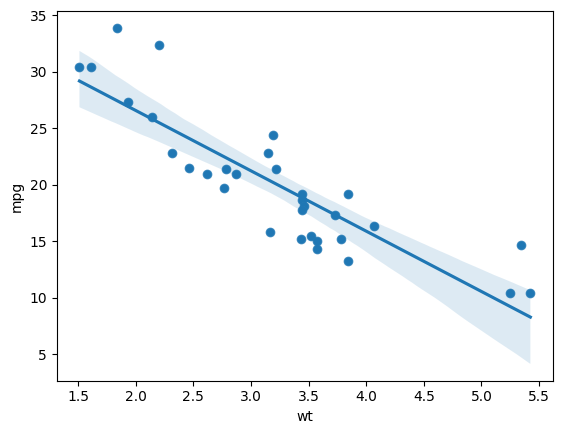

In [4]:
sns.scatterplot(x='wt', y='mpg', data=df_cars)
sns.regplot(x='wt', y='mpg', data=df_cars)

### Convert Data to Tensors

In [5]:
X_list = df_cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = df_cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

### Create DataSet and DataLoader

In [8]:
class LinearRegressionDateSet(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_loader = DataLoader(dataset=LinearRegressionDateSet(X_np, y_np), batch_size=2)

### Create Model Class

In [19]:
# Simple Linear Regression Model Class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim=1, output_dim=1):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

### Instatiate Model

In [20]:
# Instantiate Model
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim=input_dim, output_dim=output_dim)
model.train() # set the model to training mode

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### Define Hyperparameters

In [21]:
# Use Mean Squared Error Loss Function
loss_func = nn.MSELoss()

# Learning Rate
LR = 0.02

# Optimizer Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

### Hyperparameter Tuning with Grid Search

In [22]:
net = NeuralNetRegressor(
    module=LinearRegressionModel,
    max_epochs=100,
    lr=0.02,
    iterator_train__shuffle=True
)
net.set_params(train_split=False, verbose=0) # turn off validation and logging
params = {
    'lr': [0.02, 0.05, 0.08],
    'max_epochs': [10, 200, 500]
}

gs = GridSearchCV(net, params, refit=False, cv=3, scoring='r2', verbose=2)

gs.fit(X, y_true)

print(f"best score: {gs.best_score_:.3f}, best params: {gs.best_params_}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.1s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.1s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.1s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.4s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.05, ma

d:\MyGithub\ML_PyTorch_Experiments\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1292: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)
d:\MyGithub\ML_PyTorch_Experiments\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [-2.74598440e+00 -4.68120178e-01  3.64286522e-01 -2.48248792e+00
  3.53633940e-01  5.87937295e-01 -5.99238981e+01 -3.43072198e+19
            -inf]
  warnings.warn(
d:\MyGithub\ML_PyTorch_Experiments\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1146: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
